In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm

In [3]:
sns.set(context='talk', font_scale=1.0, color_codes=True, palette='deep', style='ticks',
        rc={'mathtext.fontset': 'cm', 'xtick.direction': 'in','ytick.direction': 'in',
            'axes.linewidth': 1.5, 'figure.dpi':80, 'text.usetex':False})

In [3]:
class SpinSystem:
    ''' 
    Store a spin system with interaction matrix J, spin state S, and temperature T
    Has methods to update spin-by-spin according to Glauber dynamics

    ...
    
    Attributes
    --------------
    J : np.array(N,N)
        interaction matrix
    S : np.array(N)
        spin array
    T : float
        system temperature
    anneal : boolean
        whether or not to simulate annealing
    anneal_args : float
        argument(s) for decreasing the temperature
    
    Sub-functions
    --------------
    energy()
        returns current value of total energy in the absence of an external field (eqn 3.59)
    decrease_temperature(a = schedule parameter)
        defines the annealing schedule
    update(k = spin index)
        determines whether or not spin k flips and updates the spin array accordingly
        decrease temperature with each step, if annealling is on
    '''
    
    def __init__(self, stored_states, S, couplings=[0, 0], T=0, anneal=False, anneal_args=0.005, switches=None):
        self.stored_states = stored_states
        self.S = S.copy()
        self.J = self.generate_hopfield(stored_states)
        self.switches = switches
        self.T = T
        self.anneal = anneal
        self.anneal_args = anneal_args
        self.couplings = couplings
    
    def decrease_temperature(self):
        self.T = self.T/(1 + self.anneal_args*self.T)
        
    def generate_hopfield(self, states):
        N = states.shape[1]
        J_hopf = (1/N)*np.transpose(states).dot(states)

        np.fill_diagonal(J_hopf, 0) # make sure the spins don't self-interact

        return J_hopf 
    
    ## field to switch from initial state mu to final state nu
    def calculate_switching_field(self, mu, nu):
            return self.stored_states[nu].dot(self.stored_states[mu].dot(self.S))
    
    def update(self, k):
        # Field due to interacting spins
        field_interaction = 0.5*self.S.dot(self.J)
        
#         field_switch = 0
        # Switching field(s)
#         for switch in self.switches:
#             strength, initial_state, final_state = switch
#             field_switch += strength*self.calculate_switching_field(initial_state, final_state)
#         field_switch = (0.1*(self.stored_states[2].dot(self.S) + self.stored_states[1].dot(self.S)) + self.calculate_switching_field(0, 1) 
#                         + self.calculate_switching_field(0, 2) - self.calculate_switching_field(1,2) - self.calculate_switching_field(2,1))

        field_switch = (self.couplings[0]*self.calculate_switching_field(0, 1) 
                        + self.couplings[1]*self.calculate_switching_field(0, 2))
    
        if 
        
    
        field_total = field_interaction + field_switch
        
        # Change in energy due to flipping spin k
        delta_E = 2*field_total[k]*self.S[k]

        if self.T > 0:
            flip_prob = 1/(np.exp(delta_E/self.T) + 1)
        else:
            flip_prob = 0
        random = np.random.rand()

        if (delta_E < 0) or (random < flip_prob):
            self.S[k] = -self.S[k]
            
        if self.anneal:
            self.decrease_temperature()

# Hopfield Model
Reference: *Neural networks and physical systems with emergent collective computational abilities* by J. J. Hopfield

Generate the stored states and initialize the system

In [4]:
# Choose a system size
N = 1000

# Choose p random states of size N to store
p = 3

# Generate random states to store
stored_states = np.empty((p, N))
for i in range(p):
    stored_states[i] = np.random.choice([-1,1],size=N)
    
# List of switches to encode
# Format: [switching strength, initial state, final state]
# switches = [[1., 0, 1],
#             [1., 0, 2],
#             [-0.5, 1, 2],
#             [-0.5, 2, 1]
#            ]

couplings = [1., 0.]

# Choose a stored state as the initial state
S0 = stored_states[0]

# Choose a random state as the initial state
# S0 = np.random.choice([-1,1],size=N)

T_hopf = 0.5

system_hopf = SpinSystem(stored_states=stored_states, couplings=couplings, S=S0, T=T_hopf, anneal=True)

Time-evolve the system

In [57]:
total_time = 10*N # how many time steps to take

time = range(total_time)
magnetizations = np.empty((p, total_time))

for t in time:
    for i in range(p): # find magnetization for each stored state
        magnetizations[i][t] = (1/N)*stored_states[i].dot(system_hopf.S)
    
    system_hopf.update(t%N) # update spin t mod N

C:\Users\maria\AppData\Local\Temp\ipykernel_16432\1741132927.py:78: RuntimeWarning: overflow encountered in exp
  flip_prob = 1/(np.exp(delta_E/self.T) + 1)


Plot the evolution

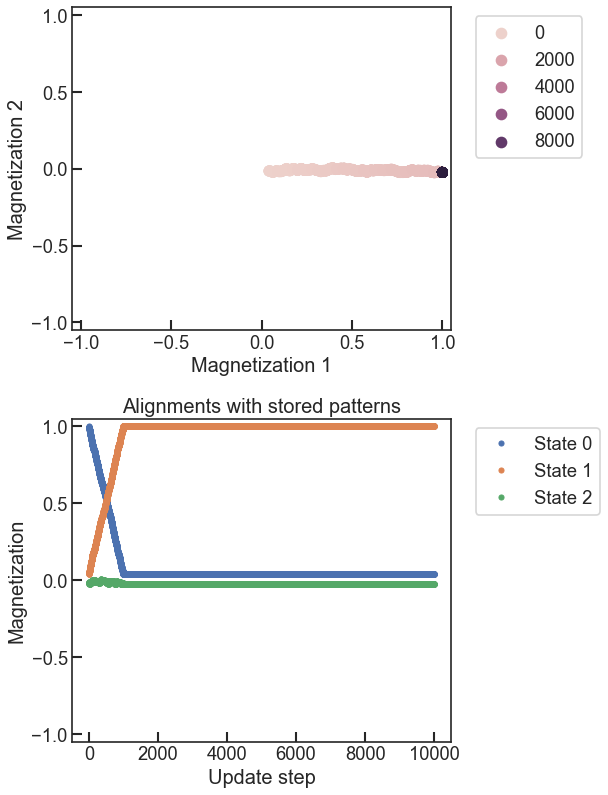

In [58]:
plt.figure(figsize=(8, 10))

xaxis = 1
yaxis = 2

plt.subplot(2, 1, 1)
plt.xlabel('Magnetization {}'.format(xaxis))
plt.ylabel('Magnetization {}'.format(yaxis))
sns.scatterplot(x=magnetizations[xaxis], y=magnetizations[yaxis], hue=time, edgecolor=None)
plt.xlim([-1.05,1.05])
plt.ylim([-1.05,1.05])
plt.legend(bbox_to_anchor=(1.04, 1.), loc='upper left')

plt.subplot(2, 1, 2)
plt.title('Alignments with stored patterns')
# plt.title('Magnetizations (p = {})'.format(p))
plt.ylabel('Magnetization')
for i in range(p):
    plt.plot(time, magnetizations[i], '.', label="State {}".format(i))
plt.ylim([-1.05,1.05])
plt.legend(bbox_to_anchor=(1.04, 1.), loc='upper left')

plt.tight_layout()
plt.xlabel('Update step')
plt.show()

In [59]:
def find_final_magnetizations(couplings, p, N):
    stored_states = np.empty((p, N))
    for i in range(p):
        stored_states[i] = np.random.choice([-1,1],size=N)
        
    S0 = stored_states[0]
    T_hopf = 0.
    system_hopf = SpinSystem(stored_states=stored_states, couplings=couplings, S=S0, T=T_hopf)
    
    total_time = 10*N # how many time steps to take

    time = range(total_time)
    magnetizations = np.empty((p, total_time))

    for t in time:
        for i in range(p): # find magnetization for each stored state
            magnetizations[i][t] = (1/N)*stored_states[i].dot(system_hopf.S)
        system_hopf.update(t%N) # update spin t mod N
        
    return (magnetizations[0][-1], magnetizations[1][-1], magnetizations[2][-1])

In [60]:
couplings_1 = np.linspace(-1, 1, 10)
couplings_2 = np.linspace(-1, 1, 10)

final_magnetizations = {'0': pd.DataFrame(index=couplings_1, columns=couplings_2),
                        '1': pd.DataFrame(index=couplings_1, columns=couplings_2),
                        '2': pd.DataFrame(index=couplings_1, columns=couplings_2)
                       }

for coupling_1 in tqdm(couplings_1):
    for coupling_2 in couplings_2:
        magnetizations = find_final_magnetizations((coupling_1, coupling_2), 3, 1000)
        for dataframe, magnetization in zip(final_magnetizations.values(), magnetizations):
            dataframe.loc[coupling_1, coupling_2] = magnetization

100%|██████████| 10/10 [10:20<00:00, 62.05s/it]


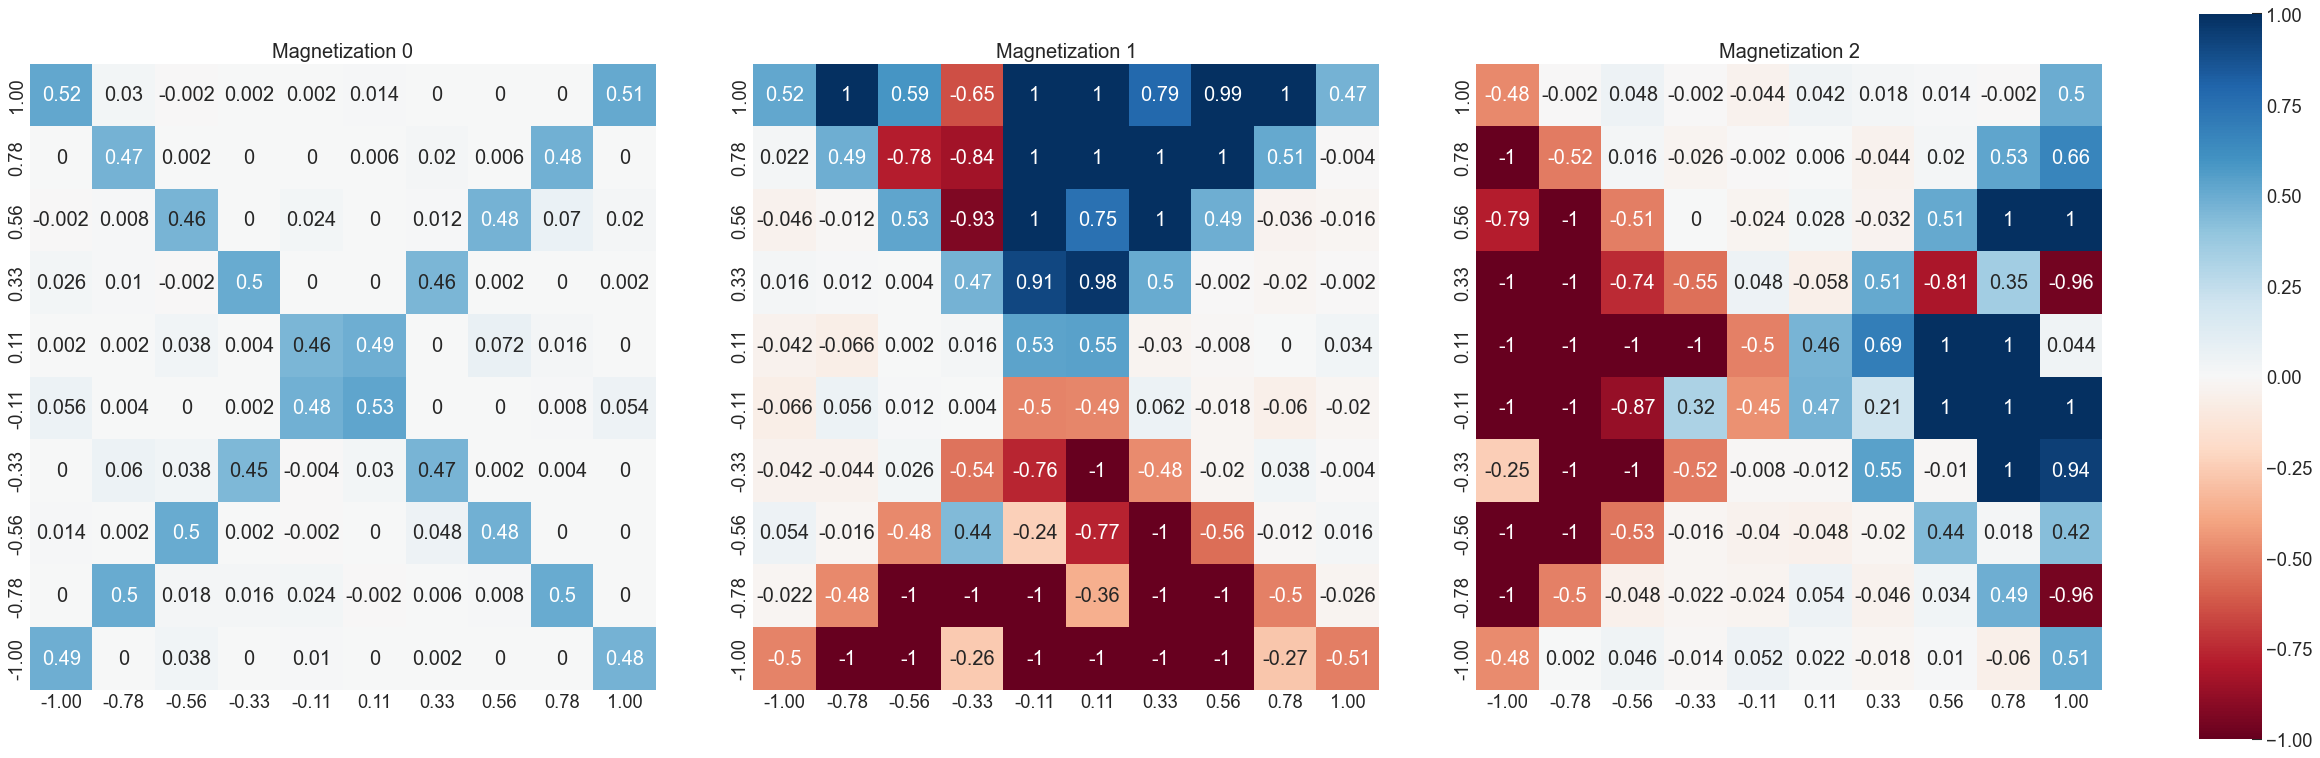

In [61]:
fig, axes = plt.subplots(1, 4, figsize=(36,12),
                         gridspec_kw={'width_ratios': [1, 1, 1, 0.1]})

cbar_ax = axes[3]

for i in range(3):
    dataframe = final_magnetizations[str(i)].astype(float).copy()
    dataframe.index = ['{:.2f}'.format(index) for index in dataframe.index]
    dataframe.columns = ['{:.2f}'.format(column) for column in dataframe.columns]
    sns.heatmap(dataframe, ax=axes[i], cmap='RdBu', annot=True, cbar_ax=cbar_ax, vmin=-1, vmax=1)
    axes[i].set_aspect('equal')
    axes[i].invert_yaxis()
    axes[i].set_title('Magnetization {}'.format(i))
    
plt.show()

Signalling equations: compact elliptic umbilic, Euclidean metric

$$ 
\dot{x_1} = - 4 x_1^3 - 3 x_1^2 + 2x_2^2 - 2 \theta_3 x_1 - \theta_1\\
\dot{x_2} = - 4 x_2^3 + 4 x_1 x_2 - 2 \theta_3 x_2 - \theta_2
$$

In [2]:
def x1_dot(xs, thetas):
    x1, x2 = xs
    theta1, theta2, theta3 = thetas
    return -4*x1**3 - 3*x1**2 + 2*x2**2 - 2*theta3*x1 - theta1

def x2_dot(xs, thetas):
    x1, x2 = xs
    theta1, theta2, theta3 = thetas
    return -4*x2**3 + 4*x1*x2 - 2*theta3*x2 - theta2

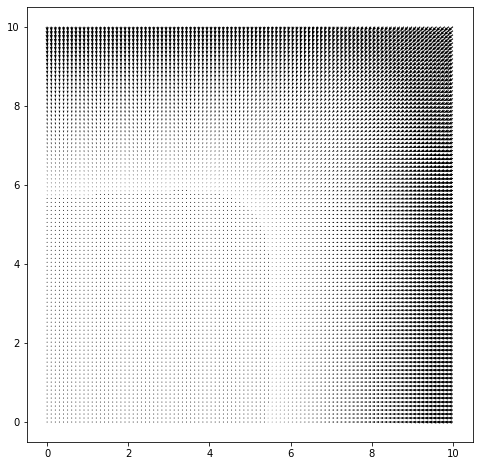

In [7]:
x1s, x2s = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
xs = [x1s, x2s]
thetas = [0, 0, 1]

plt.figure(figsize=(8,8))
plt.quiver(x1s, x2s, x1_dot(xs, thetas), x2_dot(xs, thetas))
plt.show()

Signalling equations: pitchfork bifurcation

Control parameter: a: 0 $\rightarrow$ 1

$$ \dot{x} = x(a-x^2) $$

$$ \Sigma h = x(x + \sqrt{a}) h_{01} + x(x - \sqrt(a)) h_{02} $$

In [42]:
class SpinSystem:
    ''' 
    Store a spin system with interaction matrix J, spin state S, and temperature T
    Has methods to update spin-by-spin according to Glauber dynamics

    ...
    
    Attributes
    --------------
    J : np.array(N,N)
        interaction matrix
    S : np.array(N)
        spin array
    T : float
        system temperature
    anneal : boolean
        whether or not to simulate annealing
    anneal_args : float
        argument(s) for decreasing the temperature
    
    Sub-functions
    --------------
    energy()
        returns current value of total energy in the absence of an external field (eqn 3.59)
    decrease_temperature(a = schedule parameter)
        defines the annealing schedule
    update(k = spin index)
        determines whether or not spin k flips and updates the spin array accordingly
        decrease temperature with each step, if annealling is on
    '''
    
    def __init__(self, stored_states, S, T=0, anneal=False, anneal_args=0.005):
        self.stored_states = stored_states
        self.S = S.copy()
        self.J = self.generate_hopfield(stored_states)
        self.T = T
        self.anneal = anneal
        self.anneal_args = anneal_args

        rng = np.random.default_rng()
        self.x = rng.standard_normal()*0.01
        self.a = 0
        self.couplings = [self.x*(self.x - np.sqrt(self.a)), self.x*(self.x + np.sqrt(self.a))]
    
    def decrease_temperature(self):
        self.T = self.T/(1 + self.anneal_args*self.T)
        
    def generate_hopfield(self, states):
        N = states.shape[1]
        J_hopf = (1/N)*np.transpose(states).dot(states)

        np.fill_diagonal(J_hopf, 0) # make sure the spins don't self-interact

        return J_hopf 
    
    ## field to switch from initial state mu to final state nu
    def calculate_switching_field(self, mu, nu):
            return self.stored_states[nu].dot(self.stored_states[mu].dot(self.S))
        
    def diff_eq(self, x, a):
        return x*(a - x**2)
    
    def update_x(self):
        # Note: time unit = 1 update
        self.x = self.x + self.diff_eq(self.x, self.a) #- self.T/100
        
    def update_a(self, step=0.01, limit=1):
        while self.a < limit:
            self.a = self.a + step
        
    def update_couplings(self):
        self.couplings = [self.x*(self.x - np.sqrt(self.a)), self.x*(self.x + np.sqrt(self.a))]
    
    def update_spin(self, k):
        # Field due to interacting spins
        field_interaction = 0.5*self.S.dot(self.J)
        
        field_switch = (self.couplings[0]*self.calculate_switching_field(0, 1) 
                        + self.couplings[1]*self.calculate_switching_field(0, 2))
    
        field_total = field_interaction + field_switch
        
        # Change in energy due to flipping spin k
        delta_E = 2*field_total[k]*self.S[k]

        if self.T > 0:
            flip_prob = 1/(np.exp(delta_E/self.T) + 1)
        else:
            flip_prob = 0
        random = np.random.rand()

        if (delta_E < 0) or (random < flip_prob):
            self.S[k] = -self.S[k]
            
        if self.anneal:
            self.decrease_temperature()
            
        self.update_a()
        self.update_x()
        self.update_couplings()

In [43]:
# Choose a system size
N = 1000

# Choose p random states of size N to store
p = 3

# Generate random states to store
stored_states = np.empty((p, N))
for i in range(p):
    stored_states[i] = np.random.choice([-1,1],size=N)

# Choose a stored state as the initial state
S0 = stored_states[0]

# Choose a random state as the initial state
# S0 = np.random.choice([-1,1],size=N)

T_hopf = 0.5

system_hopf = SpinSystem(stored_states=stored_states, S=S0, T=T_hopf, anneal=True)

In [44]:
rng = np.random.default_rng()
total_time = 10*N # how many time steps to take

a_array = []
x_array = []

time = range(total_time)
magnetizations = np.empty((p, total_time))

for t in time:
    for i in range(p): # find magnetization for each stored state
        magnetizations[i][t] = (1/N)*stored_states[i].dot(system_hopf.S)
    a_array += [system_hopf.a]
    x_array += [system_hopf.x]

    random_spin = rng.integers(low=0, high=N, size=1) # choose random spin from 0 to N to update
    system_hopf.update_spin(random_spin)

C:\Users\maria\AppData\Local\Temp\ipykernel_18872\2207518198.py:87: RuntimeWarning: overflow encountered in exp
  flip_prob = 1/(np.exp(delta_E/self.T) + 1)


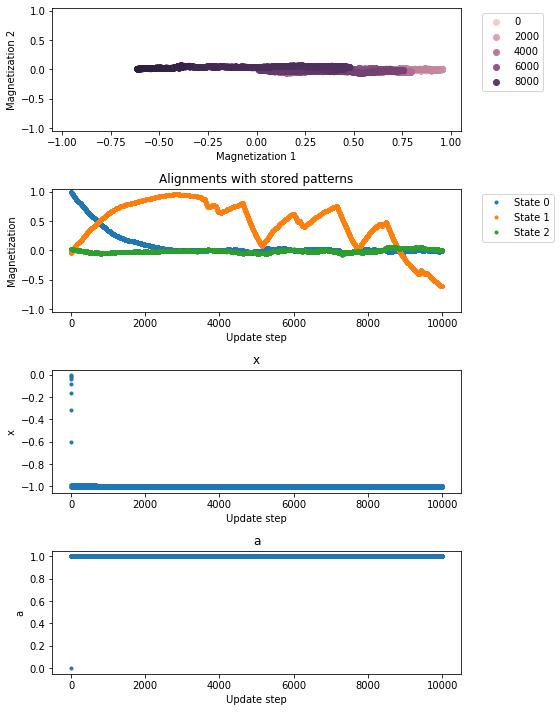

In [45]:
plt.figure(figsize=(8, 10))

xaxis = 1
yaxis = 2

nplots = 4

plt.subplot(nplots, 1, 1)
plt.xlabel('Magnetization {}'.format(xaxis))
plt.ylabel('Magnetization {}'.format(yaxis))
sns.scatterplot(x=magnetizations[xaxis], y=magnetizations[yaxis], hue=time, edgecolor=None)
plt.xlim([-1.05,1.05])
plt.ylim([-1.05,1.05])
plt.legend(bbox_to_anchor=(1.04, 1.), loc='upper left')

plt.subplot(nplots, 1, 2)
plt.title('Alignments with stored patterns')
for i in range(p):
    plt.plot(time, magnetizations[i], '.', label="State {}".format(i))
plt.ylim([-1.05,1.05])
plt.legend(bbox_to_anchor=(1.04, 1.), loc='upper left')
plt.ylabel('Magnetization')
plt.xlabel('Update step')

plt.subplot(nplots, 1, 3)
plt.title('x')
plt.plot(time, x_array, '.')
plt.ylabel('x')
plt.xlabel('Update step')

plt.subplot(nplots, 1, 4)
plt.title('a')
plt.plot(time, a_array, '.')
plt.ylabel('a')
plt.xlabel('Update step')

plt.tight_layout()
plt.show()

In [27]:
x_array

[0,
 0.004987531172069825,
 0.015448815772288044,
 0.03740160517247678,
 0.08344154555166394,
 0.1795845562097754,
 0.37626196442251214,
 0.7417955703273073,
 1.1544917323072923,
 0.8905569688186284,
 1.1687543298510337,
 0.8627474218231301,
 1.174452479798194,
 0.8512251512695448,
 1.1756193907858903,
 0.8488188309614343,
 1.1757588652069566,
 0.848510249773759,
 1.1757545910846439,
 0.84849610642695,
 1.1757326536549437,
 0.8485183390949069,
 1.175708753793157,
 0.8485447996601885,
 1.1756848103360826,
 0.8485715568244827,
 1.1756610553625058,
 0.8485981326376928,
 1.1756375146563534,
 0.848624471516058,
 1.1756141887655158,
 0.8486505695842866,
 1.1755910751857128,
 0.8486764292642004,
 1.1755681710835193,
 0.8487020537000581,
 1.1755454736304294,
 0.8487274460737453,
 1.175522980043037,
 0.848752609521479,
 1.175500687587008,
 0.8487775471246412,
 1.1754785935766043,
 0.8488022619097425,
 1.175456695373685,
 0.8488267568494837,
 1.1754349903866637,
 0.8488510348639287,
 1.175413476